In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from pycaret.regression import *

In [5]:
random_seed = 2021
np.random.seed(random_seed)

In [102]:
df = pd.read_csv('./data/train.csv',engine='python')
test_df = pd.read_csv('./data/test.csv',engine='python')

In [103]:
def processing(dt):
    dt['Date(MM/DD/YYYY)']= pd.to_datetime(dt['Date(MM/DD/YYYY)'])
    dt = dt.assign(
        Month=  dt['Date(MM/DD/YYYY)'].dt.month,
        Day = dt['Date(MM/DD/YYYY)'].dt.day,
        Year =dt['Date(MM/DD/YYYY)'].dt.year,
                  )
    dt.drop('Date(MM/DD/YYYY)', axis=1, inplace=True)
    
    return dt

In [104]:
df = processing(df)
test_df = processing(test_df)

In [105]:
df.loc[df['Solar Radiance(w/m^2)']<0,'Solar Radiance(w/m^2)'] = 0
test_df.loc[test_df['Solar Radiance(w/m^2)']<0,'Solar Radiance(w/m^2)'] = 0

In [106]:
mean_t, mean_s = df.loc[(df['Month']==2)&(df['Temperature(C)']!=-99999.0 ),['Temperature(C)','Solar Power(kW)']].mean()

In [107]:
df.loc[df['Temperature(C)']==-99999.0, ['Temperature(C)','Solar Power(kW)']] = (mean_t, mean_s)

In [116]:
train_id = df.loc[df['Temperature(C)'].isnull()].index

In [109]:
id = test_df.loc[test_df['Temperature(C)'].isnull()].index

In [11]:
reg = setup(df, target='Temperature(C)', train_size=0.8)

,Description,Value
0,session_id,1042
1,Target,Temperature(C)
2,Original Data,"(105120, 7)"
3,Missing Values,True
4,Numeric Features,4
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(82607, 27)"


In [14]:
best_3 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1.1620,2.6727,1.6347,0.9736,0.0983,0.0777,11.8140
et,Extra Trees Regressor,1.1618,2.7211,1.6495,0.9731,0.0987,0.0791,8.0710
xgboost,Extreme Gradient Boosting,1.7008,4.9172,2.2171,0.9514,0.1463,0.1326,624.8730
dt,Decision Tree Regressor,1.4488,5.0515,2.2472,0.9500,0.1299,0.0896,0.0550
lightgbm,Light Gradient Boosting Machine,2.2101,8.0117,2.8303,0.9207,0.1842,0.1811,0.2040
gbr,Gradient Boosting Regressor,2.7650,12.2231,3.4960,0.8791,0.2285,0.2428,0.7230
ridge,Ridge Regression,3.3534,17.6489,4.2010,0.8254,0.2625,0.2881,0.0210
lar,Least Angle Regression,3.3533,17.6488,4.2010,0.8254,0.2625,0.2881,0.0210
br,Bayesian Ridge,3.3534,17.6489,4.2010,0.8254,0.2625,0.2881,0.0210
huber,Huber Regressor,3.3519,17.6623,4.2026,0.8253,0.2626,0.2881,0.2210


In [15]:
best_3

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=1042, verbose=0, warm_start=False)

In [17]:
blended = blend_models(estimator_list = best_3, fold = 5,  optimize = 'MSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.5031,5.4199,2.3281,0.9467,0.1305,0.0910
1,1.5025,5.2591,2.2933,0.9485,0.1340,0.0951
2,1.5080,5.4453,2.3335,0.9458,0.1369,0.0949
3,1.5291,5.3870,2.3210,0.9461,0.1307,0.0894
4,1.5225,5.4064,2.3252,0.9467,0.1329,0.0941
Mean,1.5130,5.3835,2.3202,0.9467,0.1330,0.0929
SD,0.0108,0.0651,0.0141,0.0009,0.0023,0.0023


In [18]:
pred_holdout = predict_model(blended)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,1.3578,4.5811,2.1403,0.9548,0.1223,0.0809


In [35]:
pred_holdout

,Hour,Solar Power(kW),Day,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,...,Year_2012,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Temperature(C),Label
0,17.0,30.784685,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.622700,37.703800
1,11.0,215.384399,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,37.217701,37.700112
2,7.0,8.240232,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.355700,13.062800
3,1.0,0.000000,25.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17.071699,17.323700
4,2.0,0.000000,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,29.762800,29.565001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20637,17.0,1.732862,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.910300,11.284800
20638,18.0,42.003685,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,31.013800,31.796700
20639,23.0,0.000000,22.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.396600,5.758800
20640,6.0,0.000000,23.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.332900,2.841500


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


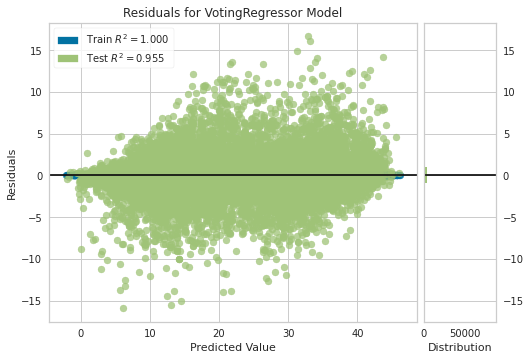

In [19]:
plot_model(blended)

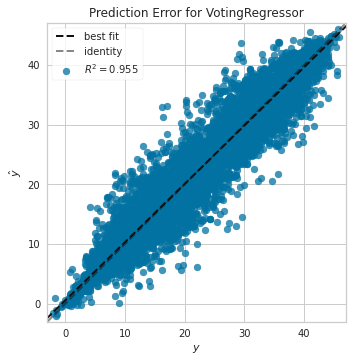

In [20]:
plot_model(blended, plot='error')

IntProgress(value=0, description='Processing: ', max=5)

KeyboardInterrupt: 

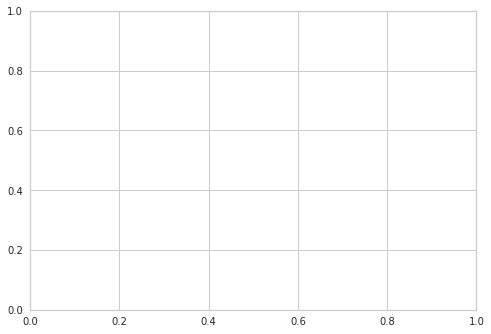

In [21]:
plot_model(blended, plot='learning')

In [22]:
final_model = finalize_model(blended)

In [49]:
save_model(final_model, 'random_tem')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='Temperature(C)',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_s...
                                              ('dt_29',
                                               DecisionTreeRegressor(ccp_alpha=0.0,
                                                                     criterion='mse',
                                                

In [50]:
pred = predict_model(final_model, data = test_df)

In [57]:
pred

,Hour,Solar Radiance(w/m^2),Temperature(C),Solar Power(kW),Month,Day,Year,Label
0,0,0.0,5.5313,0.0,1,1,2020,5.5313
1,1,0.0,5.8106,0.0,1,1,2020,5.8106
2,2,0.0,5.3325,0.0,1,1,2020,5.3325
3,3,0.0,5.5484,0.0,1,1,2020,5.5484
4,4,0.0,4.7662,0.0,1,1,2020,4.7662
...,...,...,...,...,...,...,...,...
8755,19,0.0,9.0635,0.0,12,31,2020,9.0635
8756,20,0.0,8.5637,0.0,12,31,2020,8.5637
8757,21,0.0,7.9824,0.0,12,31,2020,7.9824
8758,22,0.0,7.7303,0.0,12,31,2020,7.7303


In [110]:
test_df.loc[id,'Temperature(C)'] = pred.loc[id,'Label']

In [130]:
df.loc[train_id, 'Temperature(C)'] = pred.loc[id, 'Label'].values

In [144]:
test_df

,Hour,Solar Radiance(w/m^2),Temperature(C),Solar Power(kW),Month,Day,Year
0,0,0.0,5.5313,0.0,1,1,2020
1,1,0.0,5.8106,0.0,1,1,2020
2,2,0.0,5.3325,0.0,1,1,2020
3,3,0.0,5.5484,0.0,1,1,2020
4,4,0.0,4.7662,0.0,1,1,2020
...,...,...,...,...,...,...,...
8755,19,0.0,9.0635,0.0,12,31,2020
8756,20,0.0,8.5637,0.0,12,31,2020
8757,21,0.0,7.9824,0.0,12,31,2020
8758,22,0.0,7.7303,0.0,12,31,2020


In [145]:
test_df.to_csv('./auto2.csv')

In [136]:
r_ln = setup(data=df,target = 'Solar Radiance(w/m^2)', train_size=0.8)

,Description,Value
0,session_id,5452
1,Target,Solar Radiance(w/m^2)
2,Original Data,"(105120, 7)"
3,Missing Values,True
4,Numeric Features,4
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(82629, 28)"


In [137]:
solar_r_3 = compare_models(sort='MSE', n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2790,3.0113,1.5927,1.0000,0.0102,0.0020,10.9280
rf,Random Forest Regressor,0.2946,4.5389,1.5634,1.0000,0.0127,0.0024,12.6000
xgboost,Extreme Gradient Boosting,0.8425,6.5140,2.3331,0.9999,0.0373,0.0150,659.5290
catboost,CatBoost Regressor,0.8544,7.3067,2.5745,0.9999,0.0901,0.0679,9.1100
knn,K Neighbors Regressor,1.2154,7.6741,2.6978,0.9999,0.1014,0.0526,0.4300
dt,Decision Tree Regressor,0.7565,11.4053,2.8948,0.9999,0.0182,0.0053,0.0530
lightgbm,Light Gradient Boosting Machine,0.9431,12.7844,3.3687,0.9999,0.0426,0.0416,0.2820
gbr,Gradient Boosting Regressor,1.8196,23.0443,4.5569,0.9998,0.2753,0.1439,0.8400
ridge,Ridge Regression,11.2342,222.6480,14.9107,0.9978,1.5620,1.9965,0.0210
br,Bayesian Ridge,11.2350,222.6480,14.9107,0.9978,1.5622,1.9987,0.0320


In [146]:
solar_r_3

[ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=5452, verbose=0, warm_start=False),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=5452, verbose=0, warm_start=False),
 XGBReg

In [139]:
blended_r = blend_models(estimator_list = solar_r_3, fold = 5,  optimize = 'MSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3606,1.0914,1.0447,1.0000,0.0120,0.0042
1,0.3913,2.2201,1.4900,1.0000,0.0243,0.0046
2,0.3659,1.7957,1.3400,1.0000,0.0289,0.0045
3,0.3637,1.3902,1.1791,1.0000,0.0093,0.0043
4,0.4037,7.0181,2.6492,0.9999,0.0374,0.0048
Mean,0.3770,2.7031,1.5406,1.0000,0.0224,0.0045
SD,0.0172,2.1908,0.5742,0.0000,0.0105,0.0002


In [140]:
pred_holdout = predict_model(blended_r)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.3550,1.4064,1.1859,1.0000,0.0245,0.0079


In [141]:
pred_r= predict_model(blended_r, data = test_df)

In [143]:
pred_r.to_csv('./r.csv')